In [1]:
import numpy as np
import pandas as pd
import nltk as nlt
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = "../../data/processed/facebook_grouped_preprocessed/posts_by_month.json"

with open(file_path, "r", encoding="utf-8") as file:
    json_data = json.load(file)

# Flatten into a single list of all posts
all_posts = []
for month, posts in json_data.items():
    all_posts.extend(posts)  # Combine all posts into one list

# Create DataFrame
df = pd.DataFrame(all_posts)


In [265]:
df.head()

,month,title,date,time,score,num_comments,flair,body,combined_text
0,2025-03,is it true hardly anyone uses facebook anymore...,2025-03-05,07:30:01,200,217,Discussion,,is it true hardly anyone uses facebook anymore...
1,2025-03,found out how to customize what you see on fac...,2025-03-05,21:56:19,7,23,Discussion,its not perfect but go to where your settings ...,found out how to customize what you see on fac...
2,2025-03,facebook groups are full of bots scams and fa...,2025-03-05,19:00:24,8,8,Discussion,does anyone else feel like facebook groups are...,facebook groups are full of bots scams and fa...
3,2025-03,is there any point to hide allfrom the constan...,2025-03-05,15:14:16,13,23,Discussion,when fb went to hell a month or two ago i thou...,is there any point to hide allfrom the constan...
4,2025-03,why do things i post on someone elses timeline...,2025-03-06,00:46:54,1,2,Tech Support,for the past couple of months when i post a bi...,why do things i post on someone elses timeline...


# Text Based Analysis

In [266]:
text = df["combined_text"]

In [267]:
from collections import Counter
import re

# Total character counts per post
character_count = list(map(lambda x:len(x),text))

df["character_count"] = character_count

# Total word count per post
word_counts = list(map(lambda s: len(s.split()), text))
df["Word_count"] = word_counts

# Seperated Words from total list
words = [word.lower() for t in text for word in re.findall(r'\b\w+\b', t)]
# df["Sepeated_words"] = words

# Sepeated words PER list
words_per_list = []
for t in text:
    words_per_list.append([text.lower() for text in re.findall(r'\b\w+\b', t)])

df["Seperated_List"] = words_per_list

# Frequncy of words in the entire dataframe
word_freq_counts = Counter(words)

In [268]:
# nlt.download('stopwords',download_dir="/src/EDA")
df.head()

,month,title,date,time,score,num_comments,flair,body,combined_text,character_count,Word_count,Seperated_List
0,2025-03,is it true hardly anyone uses facebook anymore...,2025-03-05,07:30:01,200,217,Discussion,,is it true hardly anyone uses facebook anymore...,74,14,"[is, it, true, hardly, anyone, uses, facebook,..."
1,2025-03,found out how to customize what you see on fac...,2025-03-05,21:56:19,7,23,Discussion,its not perfect but go to where your settings ...,found out how to customize what you see on fac...,357,68,"[found, out, how, to, customize, what, you, se..."
2,2025-03,facebook groups are full of bots scams and fa...,2025-03-05,19:00:24,8,8,Discussion,does anyone else feel like facebook groups are...,facebook groups are full of bots scams and fa...,261,49,"[facebook, groups, are, full, of, bots, scams,..."
3,2025-03,is there any point to hide allfrom the constan...,2025-03-05,15:14:16,13,23,Discussion,when fb went to hell a month or two ago i thou...,is there any point to hide allfrom the constan...,452,90,"[is, there, any, point, to, hide, allfrom, the..."
4,2025-03,why do things i post on someone elses timeline...,2025-03-06,00:46:54,1,2,Tech Support,for the past couple of months when i post a bi...,why do things i post on someone elses timeline...,421,83,"[why, do, things, i, post, on, someone, elses,..."


In [269]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))  # Load English stopwords
words = [w for w in words if w not in stop_words]
print(words)
word_freq_counts = Counter(words)
most_common = word_freq_counts.most_common(20)  

common_words_df = pd.DataFrame(most_common, columns=['Word', 'Frequency'])
common_words_df.head()

['true', 'hardly', 'anyone', 'uses', 'facebook', 'anymore', 'becoming', 'relic', 'found', 'customize', 'see', 'facebook', 'without', 'extra', 'crap', 'perfect', 'go', 'settings', 'click', 'feeds', 'see', 'posts', 'actual', 'friends', 'groups', 'pages', 'follow', 'commenter', 'whos', 'gonna', 'say', 'delete', 'facebook', 'yes', 'youre', 'cool', 'unique', 'awesome', 'everyone', 'like', 'facebook', 'groups', 'full', 'bots', 'scams', 'fake', 'accounts', 'looking', 'rn', 'anyone', 'else', 'feel', 'like', 'facebook', 'groups', 'scam', 'like', 'im', 'trying', 'find', 'clients', 'facebook', '3', 'months', 'feel', 'everyone', 'scam', 'bots', 'fake', 'id', 'help', 'please', 'point', 'hide', 'allfrom', 'constant', 'barrage', 'fb', 'content', 'fb', 'went', 'hell', 'month', 'two', 'ago', 'thought', 'could', 'least', 'train', 'algorithm', 'little', 'telling', 'dont', 'want', 'see', 'ive', 'probably', 'hide', 'alld', 'couple', 'hundred', 'pages', 'still', 'bad', 'ever', 'honestly', 'would', 'delete',

,Word,Frequency
0,facebook,25
1,posts,9
2,im,9
3,help,9
4,anyone,8


In [270]:
from nltk.util import ngrams

# Generate unigrams, bigrams, trigrams
unigrams = list(ngrams(words, 1))
bigrams = list(ngrams(words, 2))
trigrams = list(ngrams(words, 3))

# Count most common n-grams

grams_df = pd.DataFrame()
grams_df["bigrams"] = Counter(bigrams).most_common(20)
grams_df["trigrams"] = Counter(trigrams).most_common(20)
grams_df.head()


,bigrams,trigrams
0,"((anyone, else), 3)","((like, facebook, groups), 2)"
1,"((facebook, without), 2)","((take, screenshot, report), 2)"
2,"((like, facebook), 2)","((true, hardly, anyone), 1)"
3,"((facebook, groups), 2)","((hardly, anyone, uses), 1)"
4,"((dont, want), 2)","((anyone, uses, facebook), 1)"


#### So bascailly, in addidtion to the relvent data from data frame, i also need to give 
#### Bigrams, trigrams, most coommon words

In [271]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

sent = df['combined_text'].apply(lambda post: sia.polarity_scores(post)['compound'])
print(sent)

0     0.4215
1     0.9595
2    -0.8555
3     0.3268
4     0.2500
5    -0.4381
6     0.9594
7    -0.3438
8     0.7248
9    -0.8311
10    0.1395
11   -0.5574
12   -0.6491
13   -0.6124
14   -0.3400
15   -0.3400
16   -0.7398
17   -0.8034
18   -0.5789
19    0.0731
Name: combined_text, dtype: float64


In [272]:
df["Sentiment"] = sent

In [273]:
df.head()

,month,title,date,time,score,num_comments,flair,body,combined_text,character_count,Word_count,Seperated_List,Sentiment
0,2025-03,is it true hardly anyone uses facebook anymore...,2025-03-05,07:30:01,200,217,Discussion,,is it true hardly anyone uses facebook anymore...,74,14,"[is, it, true, hardly, anyone, uses, facebook,...",0.4215
1,2025-03,found out how to customize what you see on fac...,2025-03-05,21:56:19,7,23,Discussion,its not perfect but go to where your settings ...,found out how to customize what you see on fac...,357,68,"[found, out, how, to, customize, what, you, se...",0.9595
2,2025-03,facebook groups are full of bots scams and fa...,2025-03-05,19:00:24,8,8,Discussion,does anyone else feel like facebook groups are...,facebook groups are full of bots scams and fa...,261,49,"[facebook, groups, are, full, of, bots, scams,...",-0.8555
3,2025-03,is there any point to hide allfrom the constan...,2025-03-05,15:14:16,13,23,Discussion,when fb went to hell a month or two ago i thou...,is there any point to hide allfrom the constan...,452,90,"[is, there, any, point, to, hide, allfrom, the...",0.3268
4,2025-03,why do things i post on someone elses timeline...,2025-03-06,00:46:54,1,2,Tech Support,for the past couple of months when i post a bi...,why do things i post on someone elses timeline...,421,83,"[why, do, things, i, post, on, someone, elses,...",0.2500


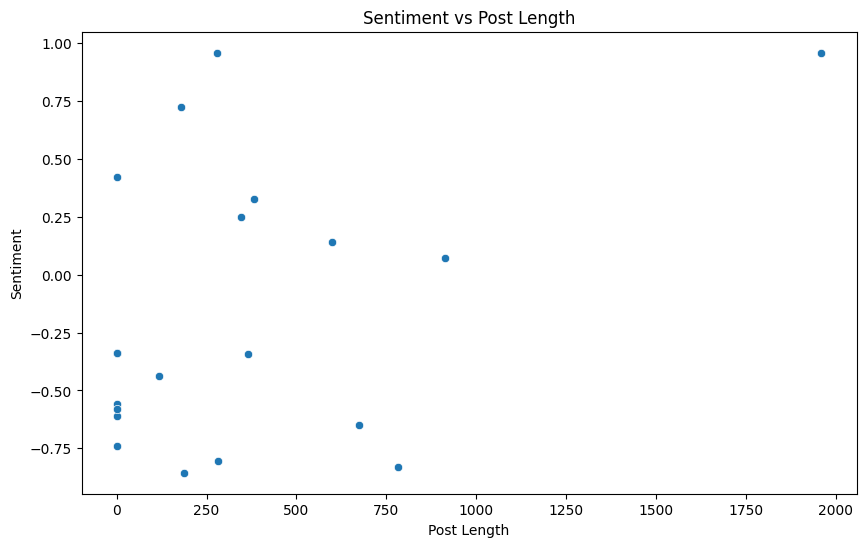

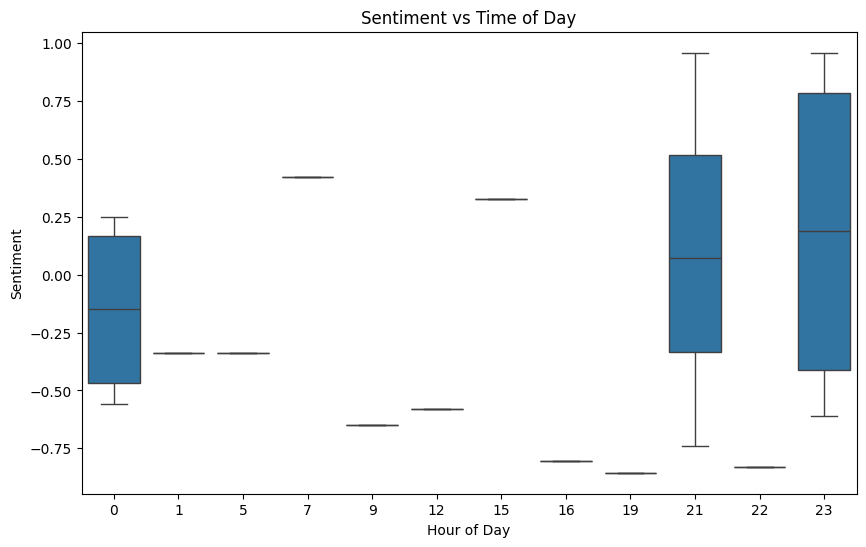

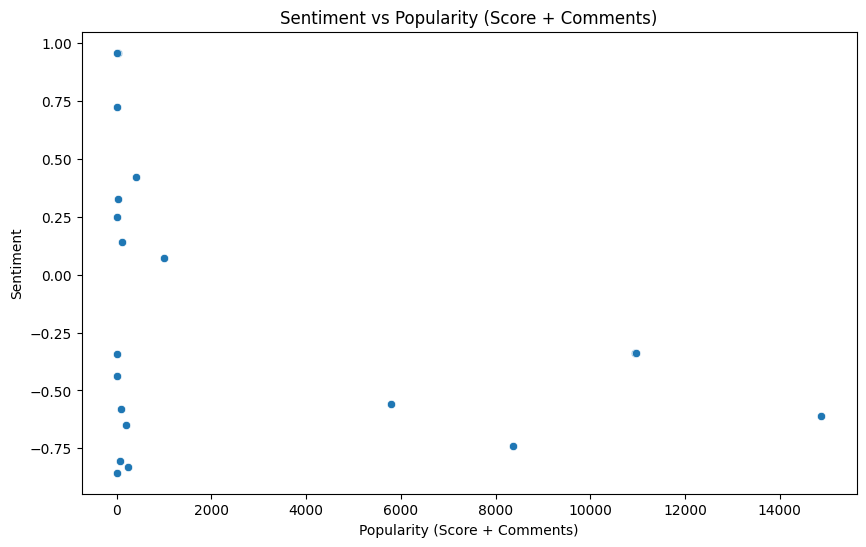

             post_length      hour  popularity  Sentiment
post_length     1.000000  0.327490   -0.410104   0.396380
hour            0.327490  1.000000   -0.089683   0.101006
popularity     -0.410104 -0.089683    1.000000  -0.325479
Sentiment       0.396380  0.101006   -0.325479   1.000000


In [274]:
###-------------------------------------------------------CHATGPT COPY PASTE HO I AINT TAKING NO ACCOUNTABILITY-----------------------------------------------------


# Assuming the DataFrame is already loaded as df
# # Create a new column for post length (character count in the 'body' column)
df['post_length'] = df['body'].apply(len)

# Extract hour from the 'time' column
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

# Analyze sentiment vs post length
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='post_length', y='Sentiment')
plt.title('Sentiment vs Post Length')
plt.xlabel('Post Length')
plt.ylabel('Sentiment')
plt.show()

# Analyze sentiment vs time of day
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='hour', y='Sentiment')
plt.title('Sentiment vs Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Sentiment')
plt.show()

# Analyze sentiment vs popularity (score and num_comments)
df['popularity'] = df['score'] + df['num_comments']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='popularity', y='Sentiment')
plt.title('Sentiment vs Popularity (Score + Comments)')
plt.xlabel('Popularity (Score + Comments)')
plt.ylabel('Sentiment')
plt.show()

# Correlations (Post length, Time, Popularity with Sentiment)
correlations = df[['post_length', 'hour', 'popularity', 'Sentiment']].corr()
print(correlations)


In [275]:
relevant_columns = ['date', 'score', 'num_comments', 'flair','character_count','Word_count', 'Sentiment','post_length','hour', "popularity"]
new_df = df[relevant_columns]
new_df.head()

,date,score,num_comments,flair,character_count,Word_count,Sentiment,post_length,hour,popularity
0,2025-03-05,200,217,Discussion,74,14,0.4215,0,7,417
1,2025-03-05,7,23,Discussion,357,68,0.9595,278,21,30
2,2025-03-05,8,8,Discussion,261,49,-0.8555,186,19,16
3,2025-03-05,13,23,Discussion,452,90,0.3268,382,15,36
4,2025-03-06,1,2,Tech Support,421,83,0.2500,345,0,3


In [276]:
import os
import json

path = "../../data/PostEDA"
processed_dir = path
os.makedirs(processed_dir, exist_ok=True)

# Convert DataFrames to dictionaries or lists of dictionaries
with open(os.path.join(processed_dir, 'relevent_dataframe.json'), 'w') as f:
    json.dump(new_df.to_dict(orient='records'), f, indent=2)

with open(os.path.join(processed_dir, 'ngrams.json'), 'w') as f:
    json.dump(grams_df.to_dict(orient='records'), f, indent=2)

with open(os.path.join(processed_dir, 'most_common_words.json'), 'w') as f:
    json.dump(common_words_df.to_dict(orient='records'), f, indent=2)
